In [72]:
#add requiered python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, datetime
import seaborn as sns
import plotly.graph_objs as go
from scipy.stats import chi2_contingency, beta

In [73]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [74]:
# reuse existing module
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from plots import *

In [75]:
df = pd.read_csv('../data/AdSmartABdata.csv')

Explorate the data

In [76]:
#data overview
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [77]:
#data decription on numeric column
df.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [78]:
#information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [79]:
#columns' name of the dataframe
df.columns

Index(['auction_id', 'experiment', 'date', 'hour', 'device_make',
       'platform_os', 'browser', 'yes', 'no'],
      dtype='object')

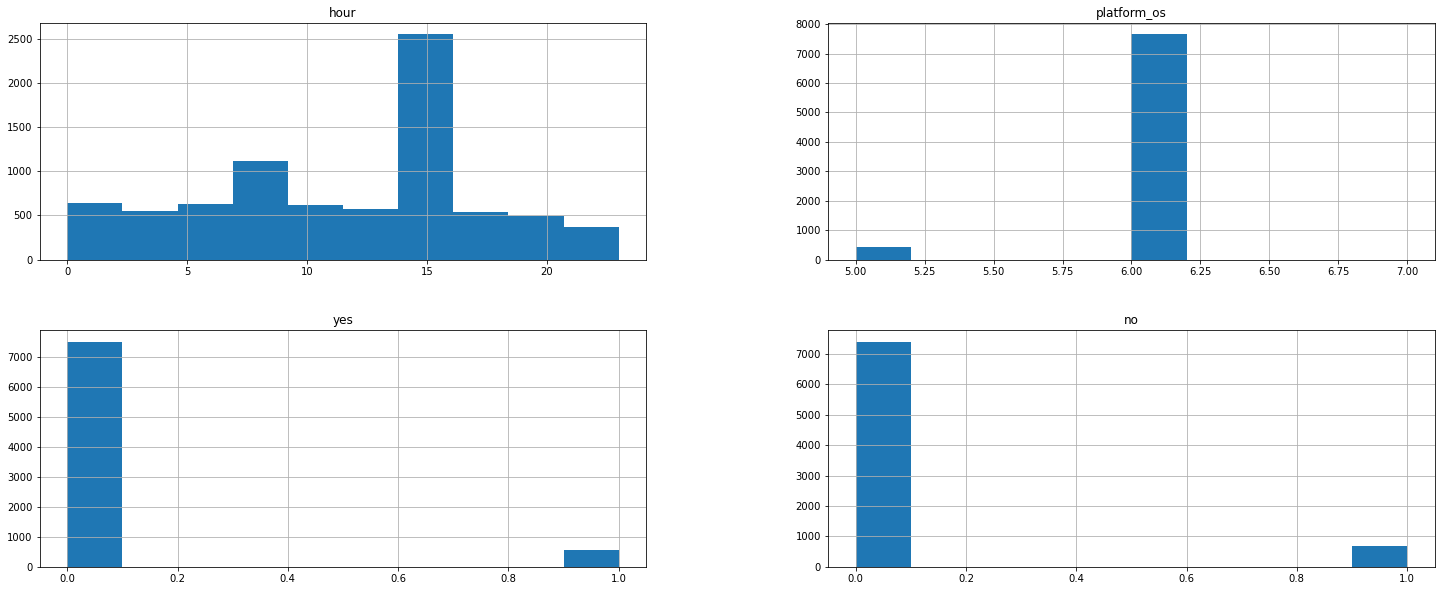

In [80]:
#visualize the given data
df.hist(bins=10, figsize=(25, 10))
plt.show()

In [81]:
# number of user completed the survey with a 'yes' or 'no'
df_yes = df[(df['experiment'] == 'exposed') & (df['yes']==1)].shape[0]
df_no = df[(df['experiment'] == 'exposed') & (df['no']==1)].shape[0]

In [82]:
print(df_yes)
print(df_no)

308
349


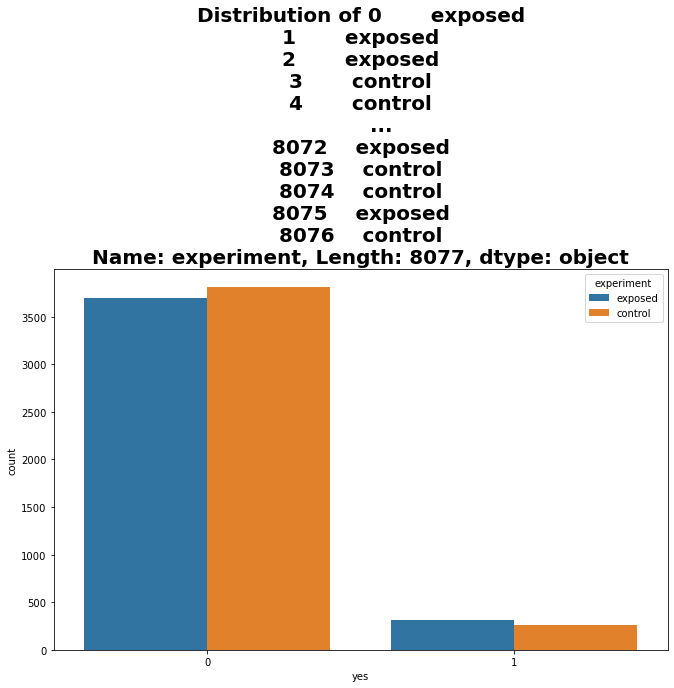

In [83]:
#plot the count of the column with yes
plot_count(df.yes, df.experiment)

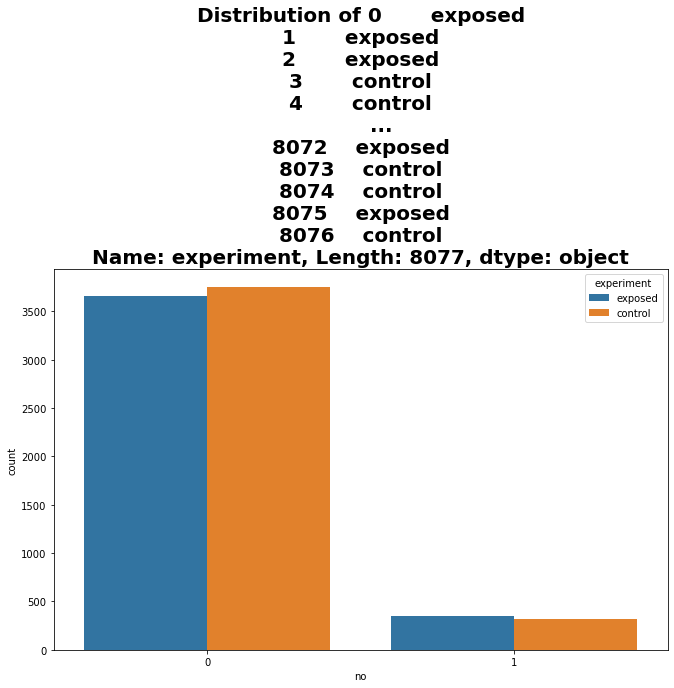

In [84]:
#plot the count of column with no
plot_count(df.no, df.experiment)

In [85]:
#number of unique users
print(f"Number of unique users: {df['auction_id'].nunique()}")


Number of unique users: 8077


In [86]:
#retrieve duration time for data collection
start_date = datetime.datetime.strptime(df['date'].min(), '%Y-%m-%d')
ending_time = datetime.datetime.strptime(df['date'].max(), '%Y-%m-%d')
duration_date = (ending_time - start_date).days
print(f"Data collected for {duration_date} days")

Data collected for 7 days


In [87]:
#percentage for users in control group
print(f"users percentage in control group: {round(df[df['experiment'] == 'control']['auction_id'].nunique() / df['auction_id'].nunique() * 100, 2)}%")

users percentage in control group: 50.4%


In [88]:
#
print(f"users percentage in exposed group: {round(df[df['experiment'] == 'exposed']['auction_id'].nunique() / df['auction_id'].nunique() * 100, 2)}%")

users percentage in exposed group: 49.6%


In [89]:
#categorize the users as engaged or non-engaged
engaged = df[~((df['yes']==0) & (df['no']==0))]
notengaged = df[(df['yes']==0) & (df['no']==0)]

In [90]:
print(f"{engaged.shape[0]} users participated")
print(f"{notengaged.shape[0]} users did not participate")

1243 users participated
6834 users did not participate


Time distribution for smart AD campaign

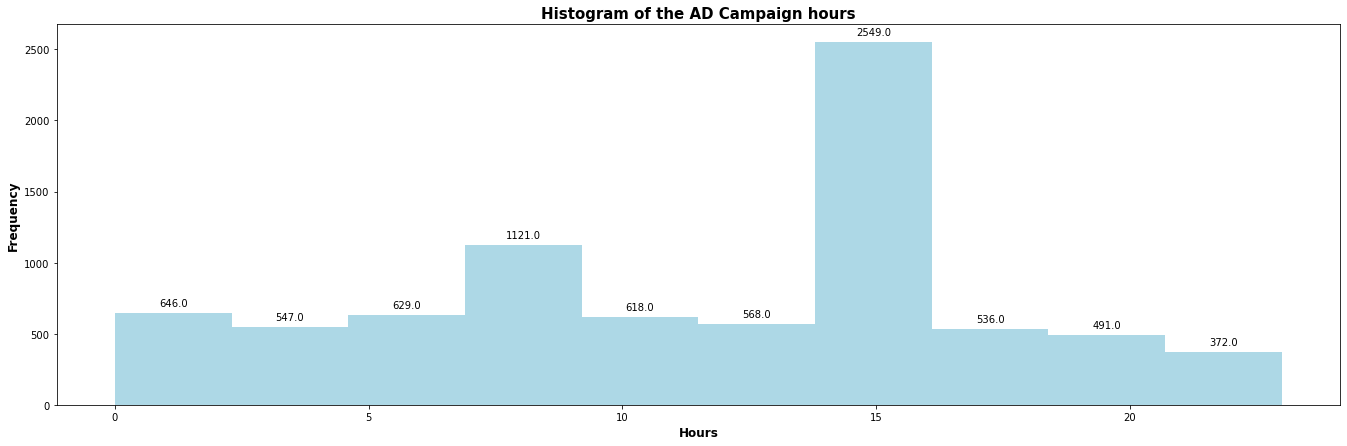

In [93]:
hrplot = df.hour.plot(kind='hist', color='lightblue', figsize=(23, 7))
get_value(hrplot)
figure_att(hrplot, 'Histogram of the AD Campaign hours', 'Hours', 'Frequency', 15, 12, 'bold')

Time distribution for the AD campaign for those who participated

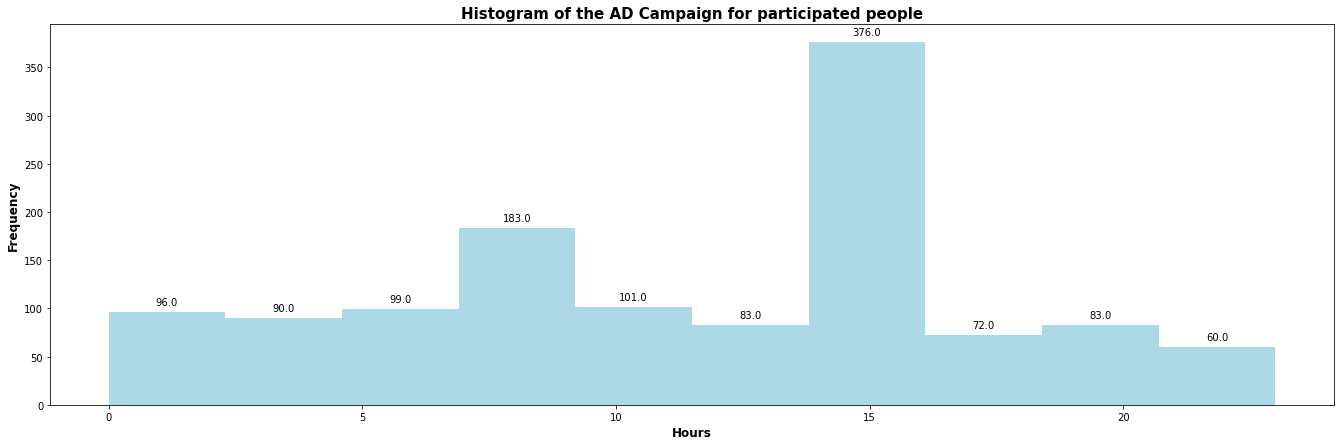

In [96]:
hrplot = engaged.hour.plot(kind='hist', color='lightblue', figsize=(23, 7))
get_value(hrplot)
figure_att(hrplot, 'Histogram of the AD Campaign for participated people', 'Hours', 'Frequency', 15, 12, 'bold')

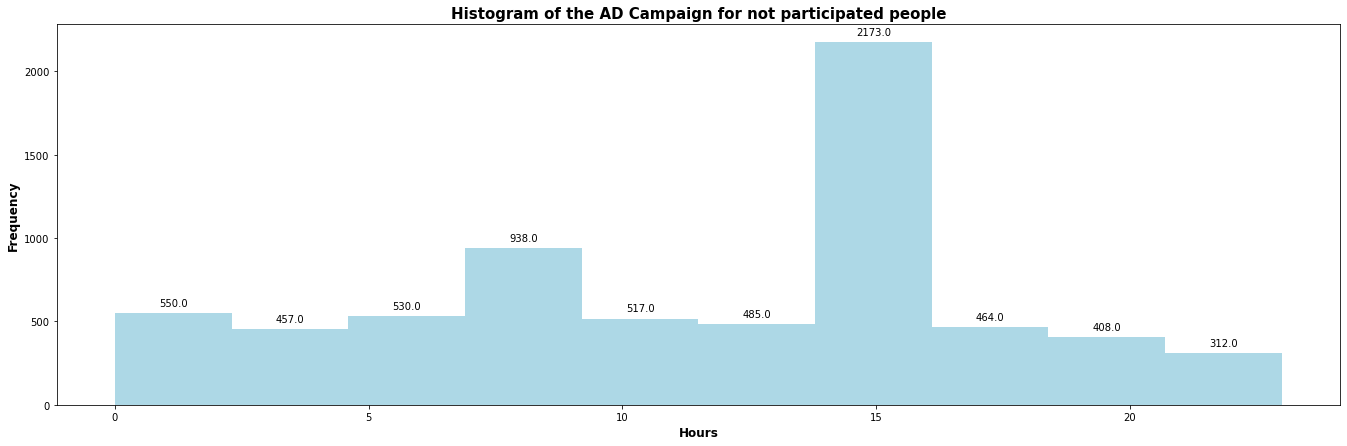

In [97]:
hrplot = notengaged.hour.plot(kind='hist', color='lightblue', figsize=(23, 7))
get_value(hrplot)
figure_att(hrplot, 'Histogram of the AD Campaign for not participated people', 'Hours', 'Frequency', 15, 12, 'bold')

Treatment groups for participated and did not participated users

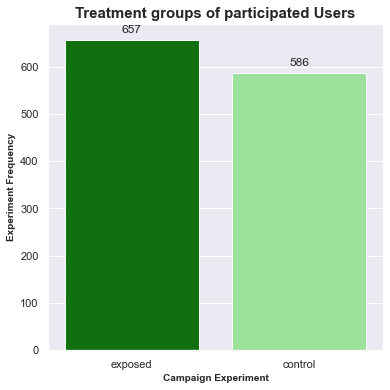

In [99]:
plt.figure(figsize=(6,6))
sns.set(style="darkgrid")
ax = sns.countplot(x="experiment", palette=["green", "lightgreen"], data=engaged)


get_value(ax)

#set the figure paremeters
figure_att(ax, "Treatment groups of participated Users", 
        "Campaign Experiment", "Experiment Frequency", 15, 10, "bold")

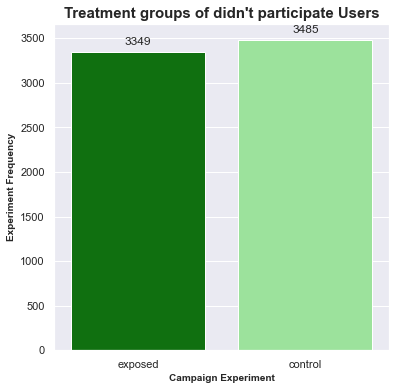

In [100]:
plt.figure(figsize=(6,6))
sns.set(style="darkgrid")
ax = sns.countplot(x="experiment", palette=["green", "lightgreen"], data=notengaged)


get_value(ax)

#set the figure paremeters
figure_att(ax, "Treatment groups of didn't participate Users", 
        "Campaign Experiment", "Experiment Frequency", 15, 10, "bold")

pie chart for showing the percentage of the experiment carried out

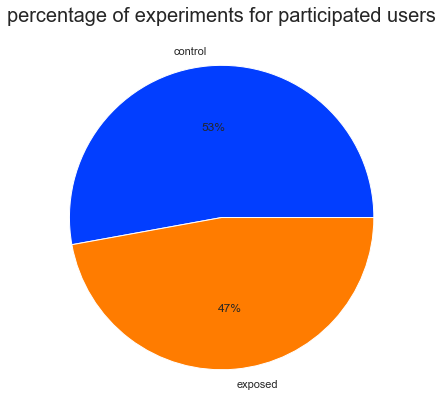

In [101]:
plot_pi(engaged[['experiment']].value_counts(), ['control', 'exposed'], "percentage of experiments for participated users")

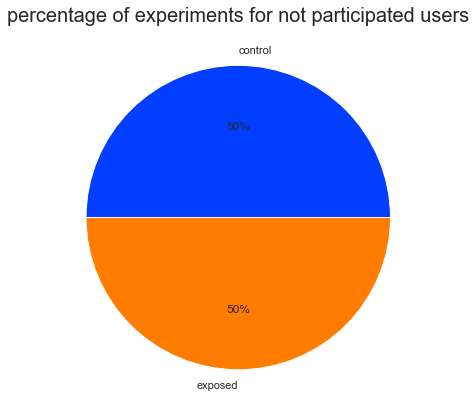

In [104]:
plot_pi(notengaged[['experiment']].value_counts().value_counts(), ['control', 'exposed'], "percentage of experiments for not participated users")

Date distributionfor the smart AD

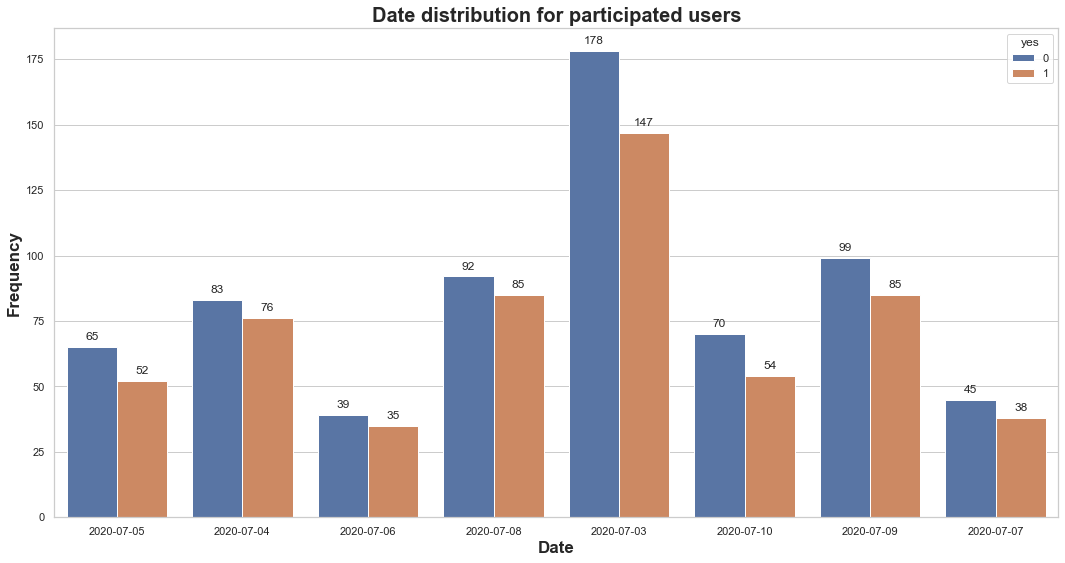

In [113]:
plt.figure(figsize=(18, 9))
sns.set(style='whitegrid')

exn = sns.countplot(x="date", palette='deep', data=engaged, hue='yes', )
get_value(exn)
figure_att(exn, "Date distribution for participated users", "Date", "Frequency", 20, 17, "bold")

Date distributionfor the smart AD not participated

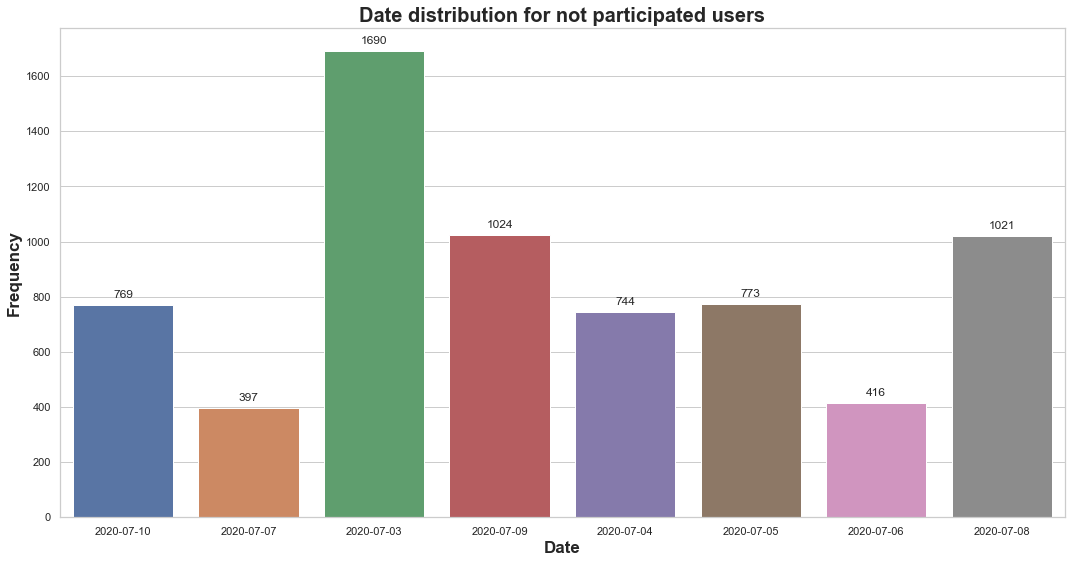

In [115]:
plt.figure(figsize=(18, 9))
sns.set(style='whitegrid')
exn = sns.countplot(x="date", palette='deep', data=notengaged, )
get_value(exn)
figure_att(exn, "Date distribution for not participated users", "Date", "Frequency", 20, 17, "bold")

Count-plot to show smart ad campaign dates using seaborn

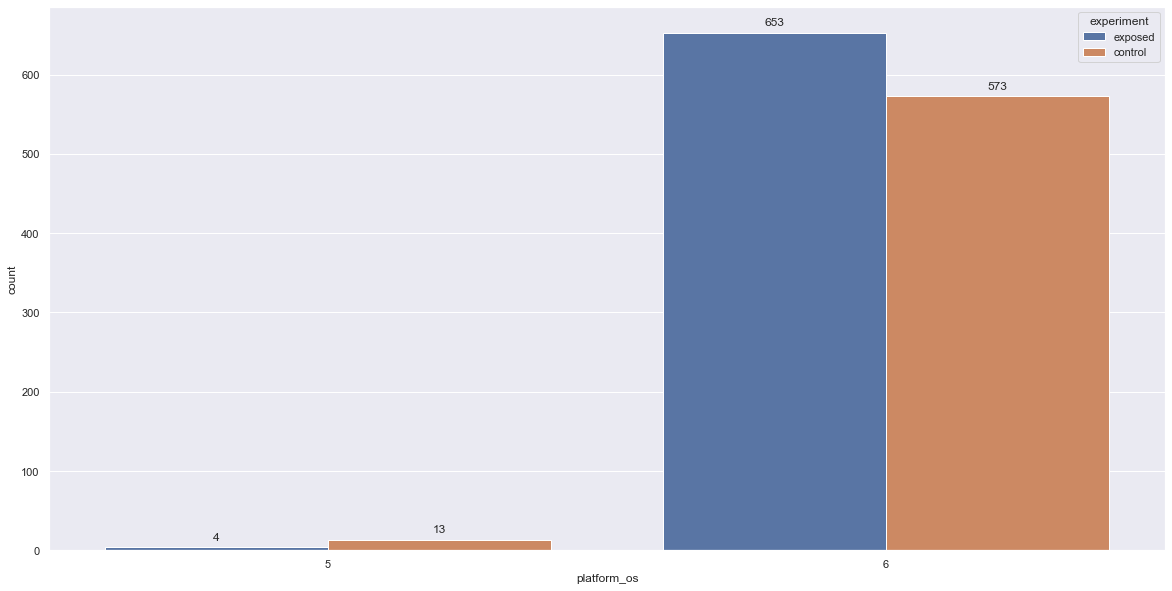

In [119]:
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")

exn = sns.countplot(x="platform_os", palette='deep', data=engaged, hue='experiment', )
get_value(exn)
figure_att(ax, "showing the users OS", "OS", "Frequency", 25, 20, "bold")


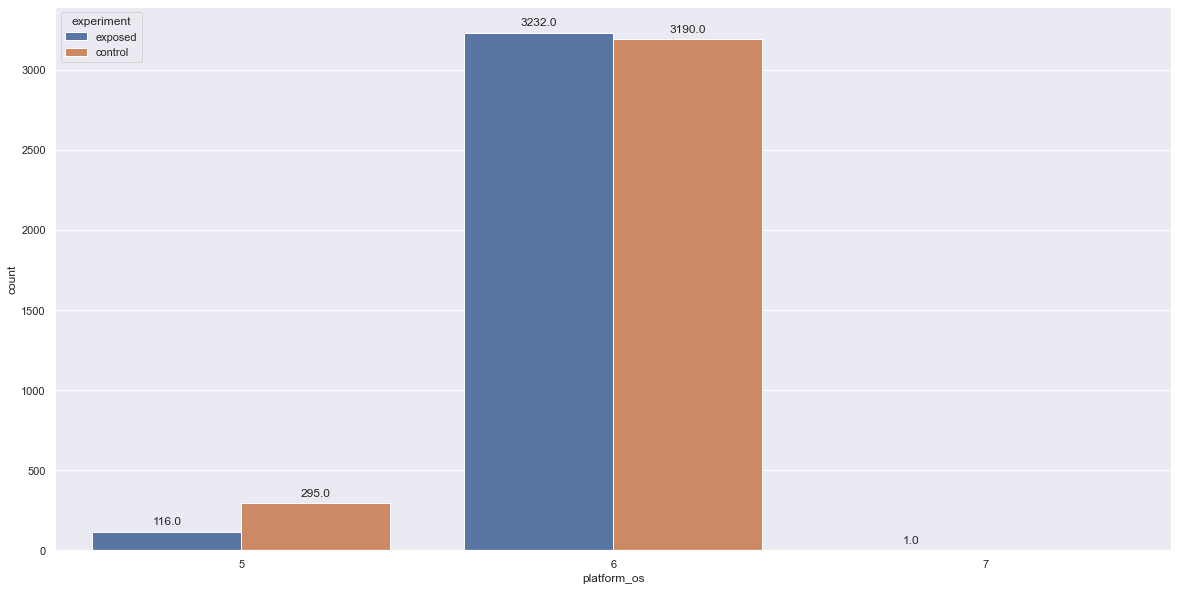

In [120]:
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")

exn = sns.countplot(x="platform_os", palette='deep', data=notengaged, hue='experiment', )
get_value(exn)
figure_att(ax, "showing the users OS", "OS", "Frequency", 25, 20, "bold")